# NN with backpropagation


Loss after iteration 0 : 0.2914445238699871
Loss after iteration 2000 : 0.015067423040453793
Loss after iteration 4000 : 0.003000025675415148
Final predictions on all training data:
[[8.06733803e-01 8.22395307e-03 9.11490094e-02 1.31660291e-03
  1.00494355e-01 1.11609949e-01 2.14832639e-04 3.73223267e-03]
 [6.10972606e-03 8.89496954e-01 3.63132297e-02 6.09527302e-04
  2.98568977e-02 2.30437394e-06 1.05039961e-01 5.25098729e-04]
 [1.09510226e-01 8.61774549e-02 8.81760044e-01 3.71399933e-05
  1.89789772e-04 1.03404928e-03 9.80718629e-03 1.05004401e-01]
 [4.73450824e-04 3.46189305e-04 1.31507177e-06 8.89246082e-01
  4.92106915e-02 4.90365104e-02 9.51980503e-02 4.66250960e-03]
 [9.10962746e-02 9.04770967e-02 1.19452936e-04 8.49914700e-02
  8.99816636e-01 1.67932621e-03 3.24578647e-03 4.46398176e-05]
 [9.40101309e-02 3.70943467e-05 1.49460020e-03 7.93712304e-02
  3.33842323e-03 8.77535178e-01 1.75384354e-03 1.21733261e-01]
 [1.90357889e-05 2.62393136e-02 4.03261139e-04 5.15440143e-02
  1.12

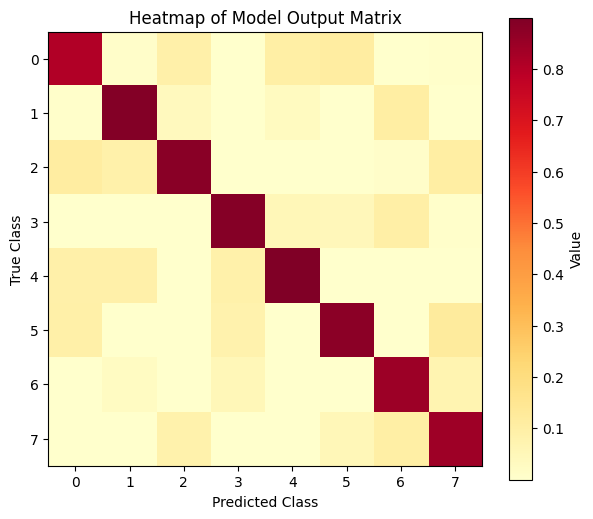

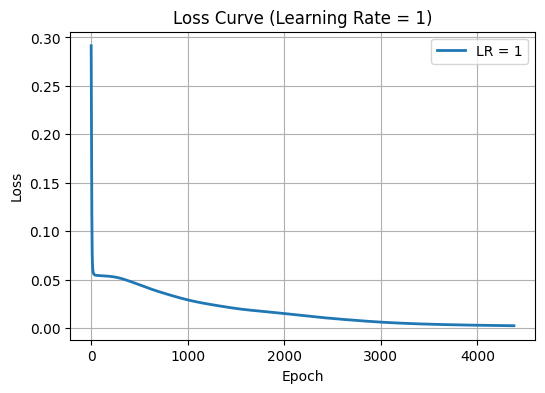

Loss after iteration 0 : 0.29004230816369
Loss after iteration 2000 : 0.027295399768598058
Loss after iteration 4000 : 0.007314593365084102
Loss after iteration 6000 : 0.0035024840894160524
Final predictions on all training data:
[[8.81983259e-01 1.00158883e-01 1.94278454e-03 9.48585557e-02
  1.57807498e-05 3.33907478e-03 6.16391776e-02 5.61775851e-04]
 [6.34213301e-02 8.70107995e-01 2.74920306e-06 9.90276043e-04
  2.12725614e-04 1.08038268e-01 1.26700256e-03 7.68446631e-02]
 [2.18777490e-03 3.67020696e-05 8.61099235e-01 8.97260274e-02
  1.22319499e-01 4.61479028e-03 6.20929358e-02 1.18739355e-03]
 [6.45768974e-02 8.33676527e-04 7.84502592e-02 8.78283993e-01
  7.27333626e-04 9.98145906e-02 2.44128681e-04 8.53128891e-06]
 [8.96113863e-06 3.40362165e-04 6.93309350e-02 1.90273048e-03
  8.57772724e-01 1.13533481e-01 1.70278099e-03 8.39421337e-02]
 [2.44734497e-04 3.26111182e-02 1.55973850e-04 4.77744466e-02
  2.34783328e-02 8.33764227e-01 3.83561953e-06 1.85389423e-03]
 [8.22349096e-02 4.5

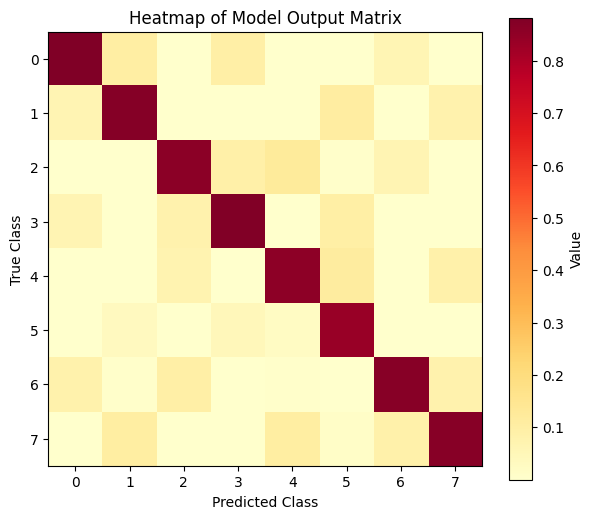

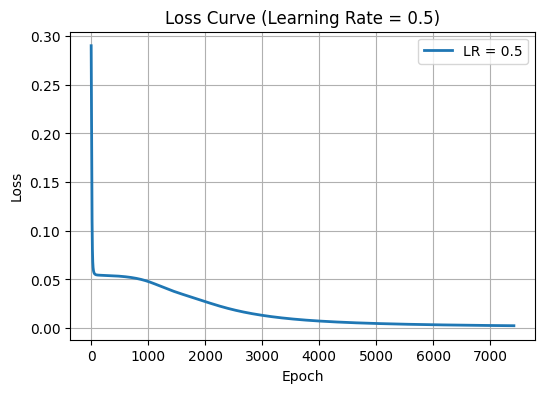

Loss after iteration 0 : 0.275702529848447
Loss after iteration 2000 : 0.053976834474303514
Loss after iteration 4000 : 0.05172820720915273
Loss after iteration 6000 : 0.04569632806659066
Loss after iteration 8000 : 0.03762002675971435
Loss after iteration 10000 : 0.03144097277918298
Loss after iteration 12000 : 0.02681293193971127
Loss after iteration 14000 : 0.022436112823385736
Loss after iteration 16000 : 0.018483323748180364
Loss after iteration 18000 : 0.014967201273886612
Loss after iteration 20000 : 0.011890674348943706
Loss after iteration 22000 : 0.00941497915993791
Loss after iteration 24000 : 0.0075870496128851075
Loss after iteration 26000 : 0.0062733652542514
Loss after iteration 28000 : 0.00531169116551161
Loss after iteration 30000 : 0.0045857932534535215
Loss after iteration 32000 : 0.004021720239651831
Loss after iteration 34000 : 0.0035724333166234695
Loss after iteration 36000 : 0.003207136375115014
Loss after iteration 38000 : 0.002904978256760681
Loss after iterat

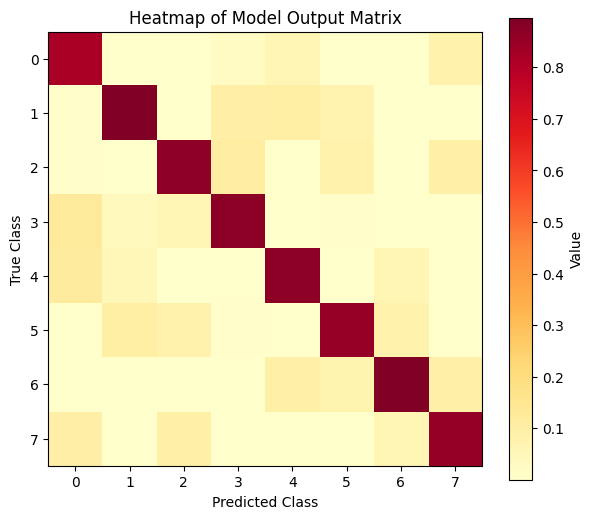

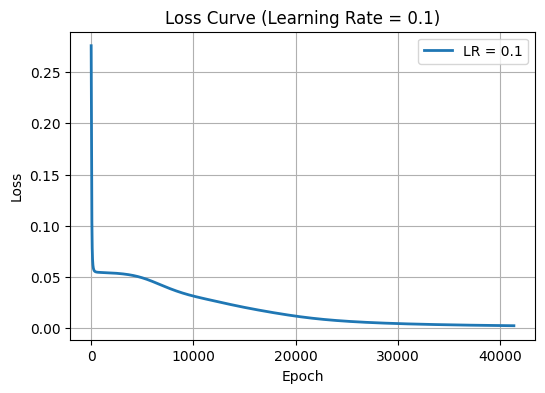

Loss after iteration 0 : 0.29590171957386513
Loss after iteration 2000 : 0.0543351214324401
Loss after iteration 4000 : 0.05390764456358509
Loss after iteration 6000 : 0.05305773203142291
Loss after iteration 8000 : 0.05127016707347529
Loss after iteration 10000 : 0.048207205628924575
Loss after iteration 12000 : 0.044251878903132924
Loss after iteration 14000 : 0.039746185423242444
Loss after iteration 16000 : 0.03581132541239009
Loss after iteration 18000 : 0.03295437020976697
Loss after iteration 20000 : 0.030816414901748627
Loss after iteration 22000 : 0.02898515179513817
Loss after iteration 24000 : 0.027241091941961622
Loss after iteration 26000 : 0.025549765253481682
Loss after iteration 28000 : 0.02393754796340452
Loss after iteration 30000 : 0.02242338967619955
Loss after iteration 32000 : 0.02103474255960542
Loss after iteration 34000 : 0.01980312470640406
Loss after iteration 36000 : 0.018729187339887203
Loss after iteration 38000 : 0.01777224804483335
Loss after iteration 4

KeyboardInterrupt: 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],
[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
x_array = np.array(x)
#X_train = x_array[0:6]
#print(X_train)
#X_test = x_array[6:8]
Y = x_array
#print(Y)

# We need to have 8 inputs (each number in a row of the matrix),a hidden layer with 3 nodes + bias and an output layer with 8 nodes

n_input = 8 # We need to have 8 inputs (each number in a row of the matrix)

n_hidden = 3
n_output = 8
np.random.seed(42)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def first_layer(X, W1, b1):
    return sigmoid(np.dot(X, W1) + b1)
#print(first_layer(X_train))

def second_layer(hidden_output, W2, b2):
    return sigmoid(np.dot(hidden_output, W2) + b2)

lr_list = [1, 0.5, 0.1, 0.05, 0.01]
for lr in lr_list: 
    loss_list= []

    W1 = np.random.rand(n_input, n_hidden) # 8 x 3 Weights for input to hidden
    #print(W1)
    W2 = np.random.rand(n_hidden, n_output) # 3 x 8 Weights for hidden to output
    #print(W2)
    b1 = np.random.rand(n_hidden) # Bias for hidden layer (3)
    b2 = np.random.rand(n_output) # Bias for output layer (8)
    for i in range(100000): # Training loop
        # Forward pass
        batches = np.array_split(x_array, 1)
        Y_batches = np.array_split(Y[0:8], 1)
        for X_batch, Y_batch in zip(batches, Y_batches):
            hidden_output = first_layer(X_batch, W1, b1)
            #print("Hidden output after iteration", i, ":", hidden_output)
            output = second_layer(hidden_output, W2, b2)
            #print("Output after iteration", i, ":", output)
            loss_value = np.mean(1/2 *(Y_batch - output) ** 2)
            loss_list.append(loss_value)
            # Backpropagation
            output_error = Y_batch - output # Derivative of the loss function * (-1); 
            # The minus sign of gradient descent has already been taken into account here
            output_delta = output_error * (output * (1 - output)) # loss derivative * sigmoid derivative (descent direction)
            #print("Output delta after iteration", i, ":", output_delta) # 8 x 2 matrix
            
            hidden_error = output_delta.dot(W2.T) # 3 x 2 matrix
            #print("Hidden error after iteration", i, ":", hidden_error)
            hidden_delta = hidden_error * (hidden_output * (1 - hidden_output))
            # Update weights and biases
            W2 += lr*(hidden_output.T.dot(output_delta)/8)
            b2 += lr*(np.sum(output_delta, axis=0)/8)
            W1 += lr*(X_batch.T.dot(hidden_delta)/8)
            b1 += lr*(np.sum(hidden_delta, axis=0)/8)
            
            if i % 2000 == 0:
                print("Loss after iteration", i, ":", np.mean(loss_value))
                #print ("Batch:", X_batch)
        if np.mean(loss_value) < 0.0025:
            final_output = second_layer(first_layer(x_array, W1, b1), W2, b2)
            print("Final predictions on all training data:")
            print(final_output)
            # print("Predictions on test data:")
            # print(second_layer(first_layer(X_test)))


            plt.figure(figsize=(7, 6))
            plt.imshow(final_output, cmap='YlOrRd', interpolation='nearest')  # red-yellow colormap
            plt.colorbar(label='Value')
            plt.title('Heatmap of Model Output Matrix')
            plt.xlabel('Predicted Class')
            plt.ylabel('True Class')
            plt.show()
            
            plt.figure(figsize=(6, 4))
            plt.plot(loss_list, label=f"LR = {lr}", linewidth=2)
            plt.title(f"Loss Curve (Learning Rate = {lr})")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid(True)
            plt.show()
            break
